In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd 'drive/My Drive/Colab Notebooks'


/content/drive/My Drive/Colab Notebooks


In [1]:
import xml.etree.ElementTree as et 
import re

In [5]:
import pandas as pd

In [19]:
import numpy as np
import pandas as pd
import os
import string
import re
import warnings 
warnings.filterwarnings('ignore')

#plotting libraries!
import matplotlib.pyplot as plt
import seaborn as sns
#from shapely.geometry import Point
#import geopandas as gpd
#from geopandas import GeoDataFrame
#%matplotlib inline



In [23]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rmahaj01\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [26]:
!pip install wordcloud

In [28]:

from collections import defaultdict

from nltk.corpus import stopwords
eng_stopwords = set(stopwords.words("english"))
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer

In [2]:
xtree = et.parse("XMLMergedFile.xml")
xroot = xtree.getroot()

In [3]:
c1=c2=0
text =[]
Bullying=[]
for child in xroot:
  for z in child:
     for x in z:
       
       if(x.tag=='TEXT'):
        flag= True 
        c1=c1+1       
        if x.text is not None:
          #print(x.text)
          text.append(re.search("Q: (.*)",x.text).group(1))
       if(flag):   
        if(x.tag=='LABELDATA'):
          flag=False
          c2=c2+1
          for y in x:
            if(y.tag=='ANSWER'):
                Bullying.append(y.text)

       

    

In [6]:
df=pd.DataFrame({
    'Text': text,'Bullying':Bullying
})

In [7]:
df

,Text,Bullying
0,what&#039;s your favorite song? :D<br>A: I lik...,No
1,<3<br>A: </3 ? haha jk! <33,No
2,&quot;hey angel you duh sexy&quot;<br>A: Real...,No
3,(:<br>A: ;(,No
4,******************MEOWWW**********************...,No
5,any makeup tips? i suck at doing my makeup lol...,No
6,Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...,No
7,Are you a morning or night person?<br>A: Night...,No
8,are you a trusting person?<br>A: alreadi answrd,No
9,are you a trusting person?<br>A: Yes veryy tru...,No


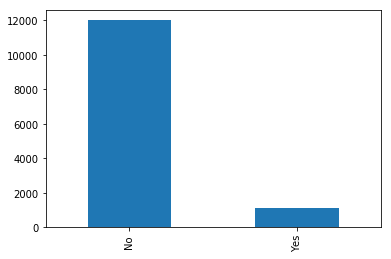

In [15]:
df['Bullying'].value_counts().plot(kind='bar')

In [14]:
df.Bullying.unique()

array(['No', 'Yes', None], dtype=object)

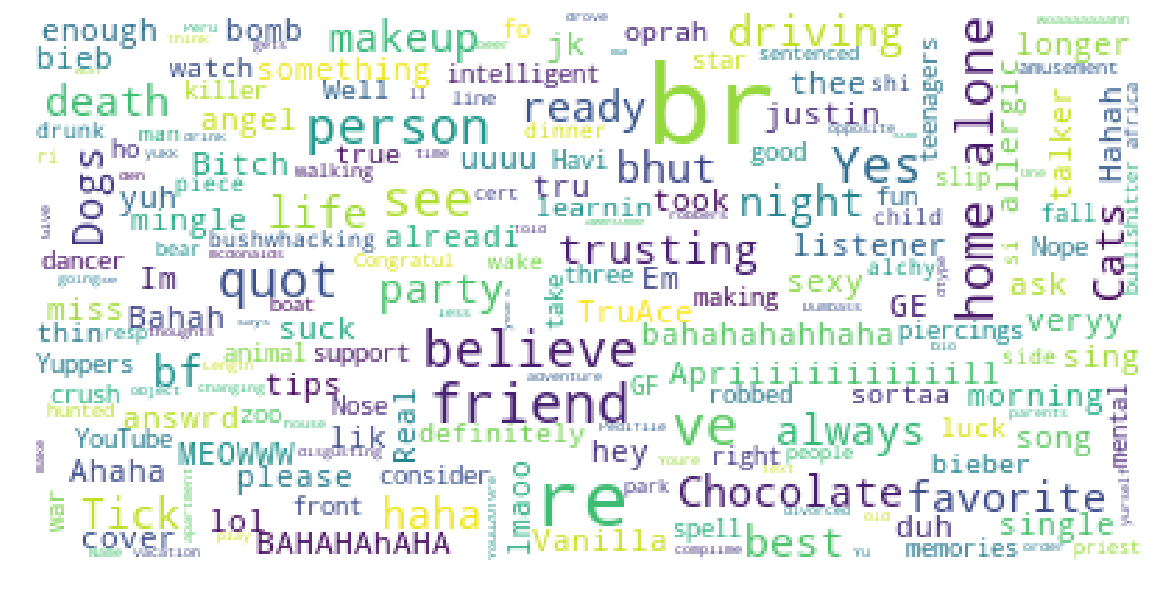

In [30]:
wordcloud_ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df['Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

In [31]:
df['Bullying'].value_counts()

No     12004
Yes     1113
Name: Bullying, dtype: int64

In [32]:
df_majority = df[df.Bullying=="No"]
df_minority = df[df.Bullying=="Yes"]

In [33]:
df_majority = df_majority.sample(n=1113)

In [36]:
df_final = pd.concat([df_majority,df_minority])

In [38]:
df_final['Bullying'].value_counts()

No     1113
Yes    1113
Name: Bullying, dtype: int64

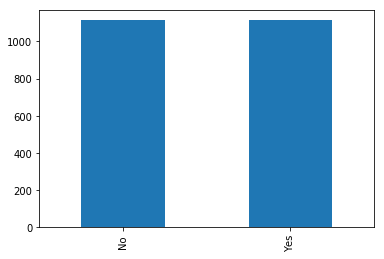

In [39]:
df_final['Bullying'].value_counts().plot(kind='bar')

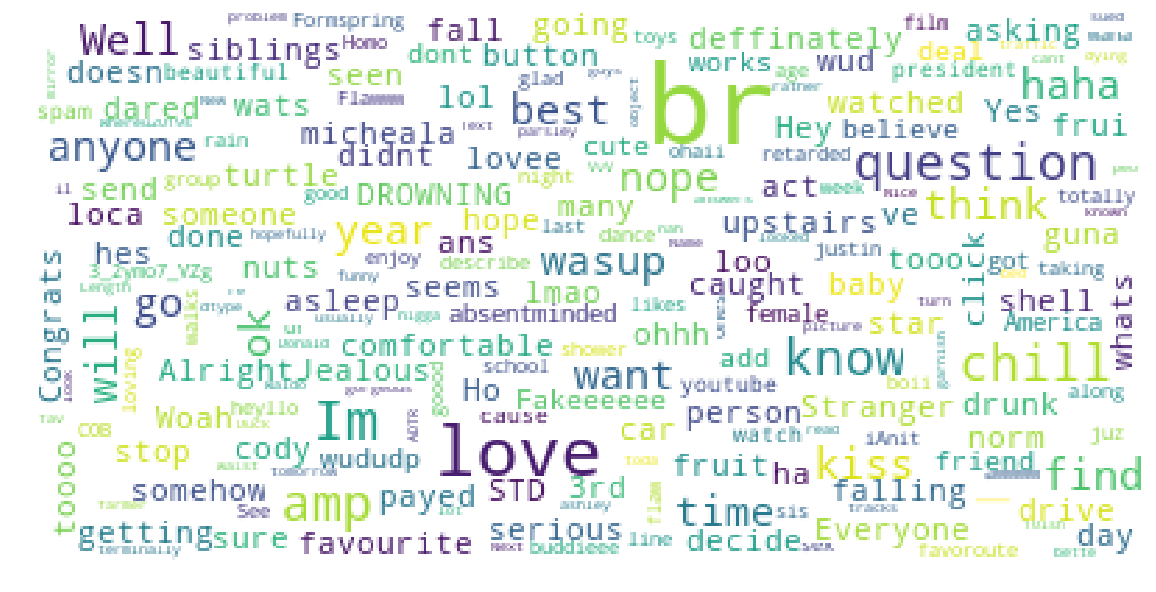

In [40]:
wordcloud_ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df_majority['Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

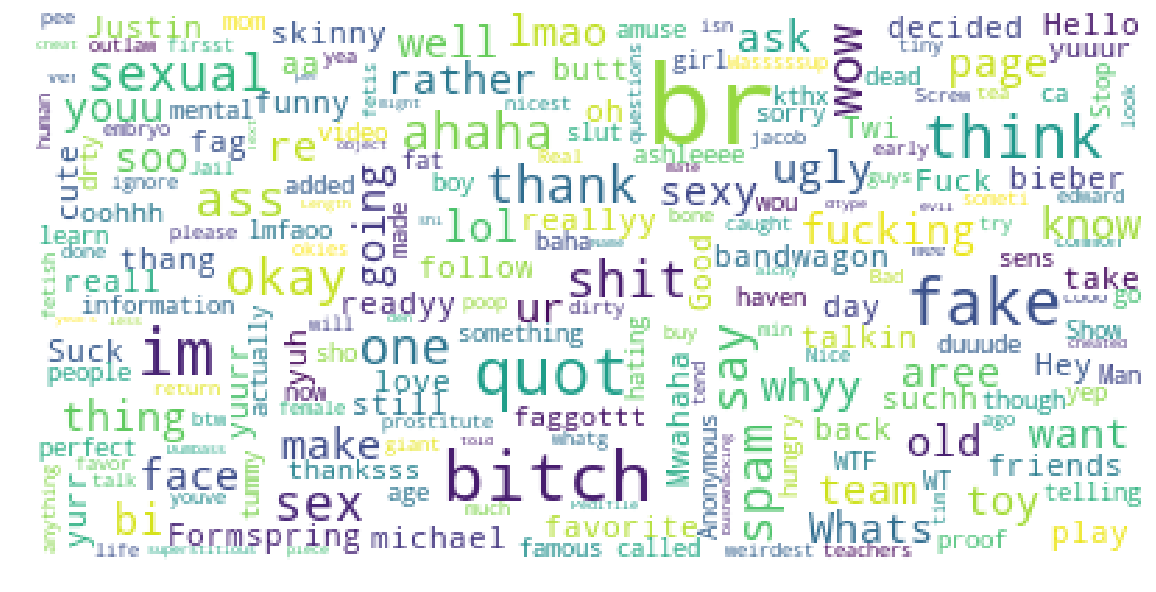

In [41]:
wordcloud_ = WordCloud(
                          background_color='white',
                          stopwords=set(STOPWORDS),
                          max_words=250,
                          max_font_size=40, 
                          random_state=1705
                         ).generate(str(df_minority['Text'].dropna()))
def cloud_plot(wordcloud):
    fig = plt.figure(1, figsize=(20,15))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
cloud_plot(wordcloud_)

In [42]:
import random
from nltk.corpus import sentence_polarity
from nltk import sent_tokenize
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import subjectivity
from nltk.sentiment import SentimentAnalyzer
from nltk.sentiment.util import *

In [50]:
import re
import nltk
from nltk.corpus import stopwords
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas
from sklearn.model_selection import train_test_split
import numpy

In [76]:
def sent_to_words(raw_sent):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_sent) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    meaningful_words = [item.replace("br", "") for item in meaningful_words]
    meaningful_words = [item.replace("lol", "") for item in meaningful_words]
    meaningful_words = [item.replace("u", "") for item in meaningful_words]
    meaningful_words = [item.replace("im", "") for item in meaningful_words]
    meaningful_words = [item.replace("r", "") for item in meaningful_words]
    meaningful_words = [item.replace("would", "") for item in meaningful_words]
    return( " ".join( meaningful_words )) 

In [45]:
def clean_sent_length(raw_sent):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_sent) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len(meaningful_words)) 

In [46]:
df['sentiment']=df['Bullying'].apply(lambda x: 0 if x=='No' else 1)

In [77]:
df['clean_sent']=df['Text'].apply(lambda x: sent_to_words(x))
df['sent_length']=df['Text'].apply(lambda x: clean_sent_length(x))
train,test = train_test_split(df,test_size=0.2,random_state=42)

In [78]:
train_clean_sent=[]
for sent in train['clean_sent']:
    train_clean_sent.append(sent)
test_clean_sent=[]
for sent in test['clean_sent']:
    test_clean_sent.append(sent)

In [92]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_sent)
test_features=v.transform(test_clean_sent)

In [90]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
train_tffeatures = tfidf.fit_transform(train_clean_sent)
test_tffeatures = tfidf.fit_transform(test_clean_sent)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [99]:
Classifiers = [
    LogisticRegression(C=10,solver='liblinear',max_iter=200),
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [102]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))

Accuracy of LogisticRegressionis 0.9129939209726444
Accuracy of KNeighborsClassifieris 0.9194528875379939
Accuracy of SVCis 0.9156534954407295
Accuracy of DecisionTreeClassifieris 0.8962765957446809
Accuracy of RandomForestClassifieris 0.9293313069908815
Accuracy of AdaBoostClassifieris 0.9209726443768997
Accuracy of GaussianNBis 0.7222644376899696


In [103]:
len(df)

13159

In [104]:
len(df)
corpus = []
for i in range(0,13159):
    corpus.append(df['Text'][i])

In [106]:
tfidf = TfidfVectorizer(ngram_range=(1,3), min_df=10, stop_words=stopwords.words('english'))
X1 = tfidf.fit_transform(corpus)

In [108]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2, random_state=42)
classifier2 = LogisticRegression(C=10)
classifier2.fit(X1_train, y1_train)

ValueError: Found input variables with inconsistent numbers of samples: [13159, 0]

In [112]:
y1.shape

NameError: name 'y1' is not defined

In [113]:
df.iloc[:,1].values

array(['No', 'No', 'No', ..., 'No', 'No', 'Yes'], dtype=object)

In [70]:
df

,Text,Bullying,sentiment,clean_sent,sent_length
0,what&#039;s your favorite song? :D<br>A: I lik...,No,0,favorite song like many songs favorite,7
1,<3<br>A: </3 ? haha jk! <33,No,0,haha jk,3
2,&quot;hey angel you duh sexy&quot;<br>A: Real...,No,0,quot hey angel duh sexy quot really thanks haha,10
3,(:<br>A: ;(,No,0,,1
4,******************MEOWWW**********************...,No,0,meowww rawr,3
5,any makeup tips? i suck at doing my makeup lol...,No,0,makeup tips suck makeup lol sure like tell wh...,16
6,Apriiiiiiiiiiiill!!! I miss uuuu! It&#039;s Em...,No,0,apriiiiiiiiiiiill miss uuuu emma btw haha emm...,11
7,Are you a morning or night person?<br>A: Night...,No,0,morning night person night shuree,6
8,are you a trusting person?<br>A: alreadi answrd,No,0,trusting person alreadi answrd,5
9,are you a trusting person?<br>A: Yes veryy tru...,No,0,trusting person yes veryy trustin person may ...,10


In [82]:
from nltk import FreqDist 

freq_all_hashtag = FreqDist(list((" ".join(df.clean_sent)).split())).most_common(10)
freq_all_hashtag

[('wold', 2221),
 ('like', 2147),
 ('think', 1453),
 ('know', 1364),
 ('love', 1251),
 ('haha', 1160),
 ('one', 1094),
 ('get', 1065),
 ('qot', 986),
 ('eve', 961)]

In [79]:
df_NotB = df[df.Bullying=="No"]
df_B = df[df.Bullying=="Yes"]

In [83]:
from nltk import FreqDist 

freq_bully = FreqDist(list((" ".join(df_B.clean_sent)).split())).most_common(10)
freq_notbully = FreqDist(list((" ".join(df_NotB.clean_sent)).split())).most_common(10)

In [84]:
df_fbully = pd.DataFrame(freq_bully, columns=['words', 'frequency'])
df_fnotbully = pd.DataFrame(freq_notbully, columns=['words', 'frequency'])

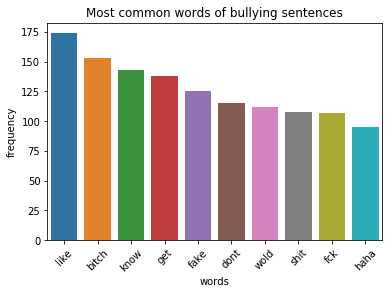

In [87]:
sns.barplot(x='words', y='frequency', data=df_fbully)
plt.xticks(rotation = 45)
plt.title('Most common words of bullying sentences')
plt.show()

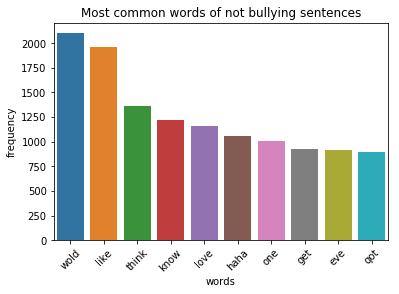

In [88]:
sns.barplot(x='words', y='frequency', data=df_fnotbully)
plt.xticks(rotation = 45)
plt.title('Most common words of not bullying sentences')
plt.show()